<a href="https://colab.research.google.com/github/amol004/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NETFLIX MOVIES AND TV SHOWS CLUSTERING**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **By -**             AMOL
####  **Cohort -** Cairo

# **Project Summary -**

# **GitHub Link -** https://github.com/amol004/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING.git

Provide your GitHub Link here.

# **Problem Statement**


The Netflix movies and TV series that are accessible as of 2019 are included in this dataset. The third-party Netflix search engine Flixable is where the dataset was gathered.

An intriguing analysis was issued in 2018 indicating that since 2010, the quantity of TV series available on Netflix has almost tripled. Since 2010, the number of movies available on the streaming service has dropped by over 2,000, but the number of TV series has increased by about three times. Investigating what further insights might be gleaned from the same dataset will be interesting.

Many intriguing insights can also be obtained by integrating this dataset with other external datasets, such as rotten tomatoes and IMDB ratings.

**Our goal is to carry out an exploratory data analysis to find out what content is accessible in various nations and whether Netflix has been concentrating more on TV shows than movies lately. Then group related content by matching text-based attributes using these insights.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics
import warnings
warnings.filterwarnings('ignore')
# to increase the number of visible columns in our data frame
from google.colab.data_table import DataTable
DataTable.max_columns = 30
#SKLEARN#
# preprocessing technique in scikit-learn that scales the features of a dataset to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
# preprocessing technique in scikit-learn that converts categorical variables into numerical values using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
# function in scikit-learn that splits a dataset into training and testing sets for machine learning model evaluation.
from sklearn.model_selection import train_test_split
# method in scikit-learn for hyperparameter tuning that performs randomized search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV
# method in scikit-learn for hyperparameter tuning that performs exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
# function in scikit-learn that performs k-fold cross-validation for model evaluation, returning an array of scores for each fold.
from sklearn.model_selection import cross_val_score
# linear regression model in scikit-learn that predicts the target variable based on linear relationship between input features and target.
from sklearn.linear_model import LinearRegression
# it is a linear regression model in scikit-learn that performs L2 regularization to prevent overfitting.
from sklearn.linear_model import Ridge
# a linear regression model in scikit-learn that performs L1 regularization to prevent overfitting and feature selection.
from sklearn.linear_model import Lasso
#  module in scikit-learn that provides various evaluation metrics for model performance, such as accuracy, precision, recall, and F1-score.
from sklearn import metrics
# metric in scikit-learn that calculates the coefficient of determination (R2) to evaluate the goodness-of-fit of a regression model.
from sklearn.metrics import r2_score
# it is a metric in scikit-learn that calculates the mean squared error (MSE) between predicted and actual values to evaluate the performance of a regression model.
from sklearn.metrics import mean_squared_error
# For Hypothesis
from scipy.stats import *
import math
# library used for textual data prerocessing
import string,re,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize, TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
# library used for Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Dataset Rows & Columns count
np.shape(df)

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

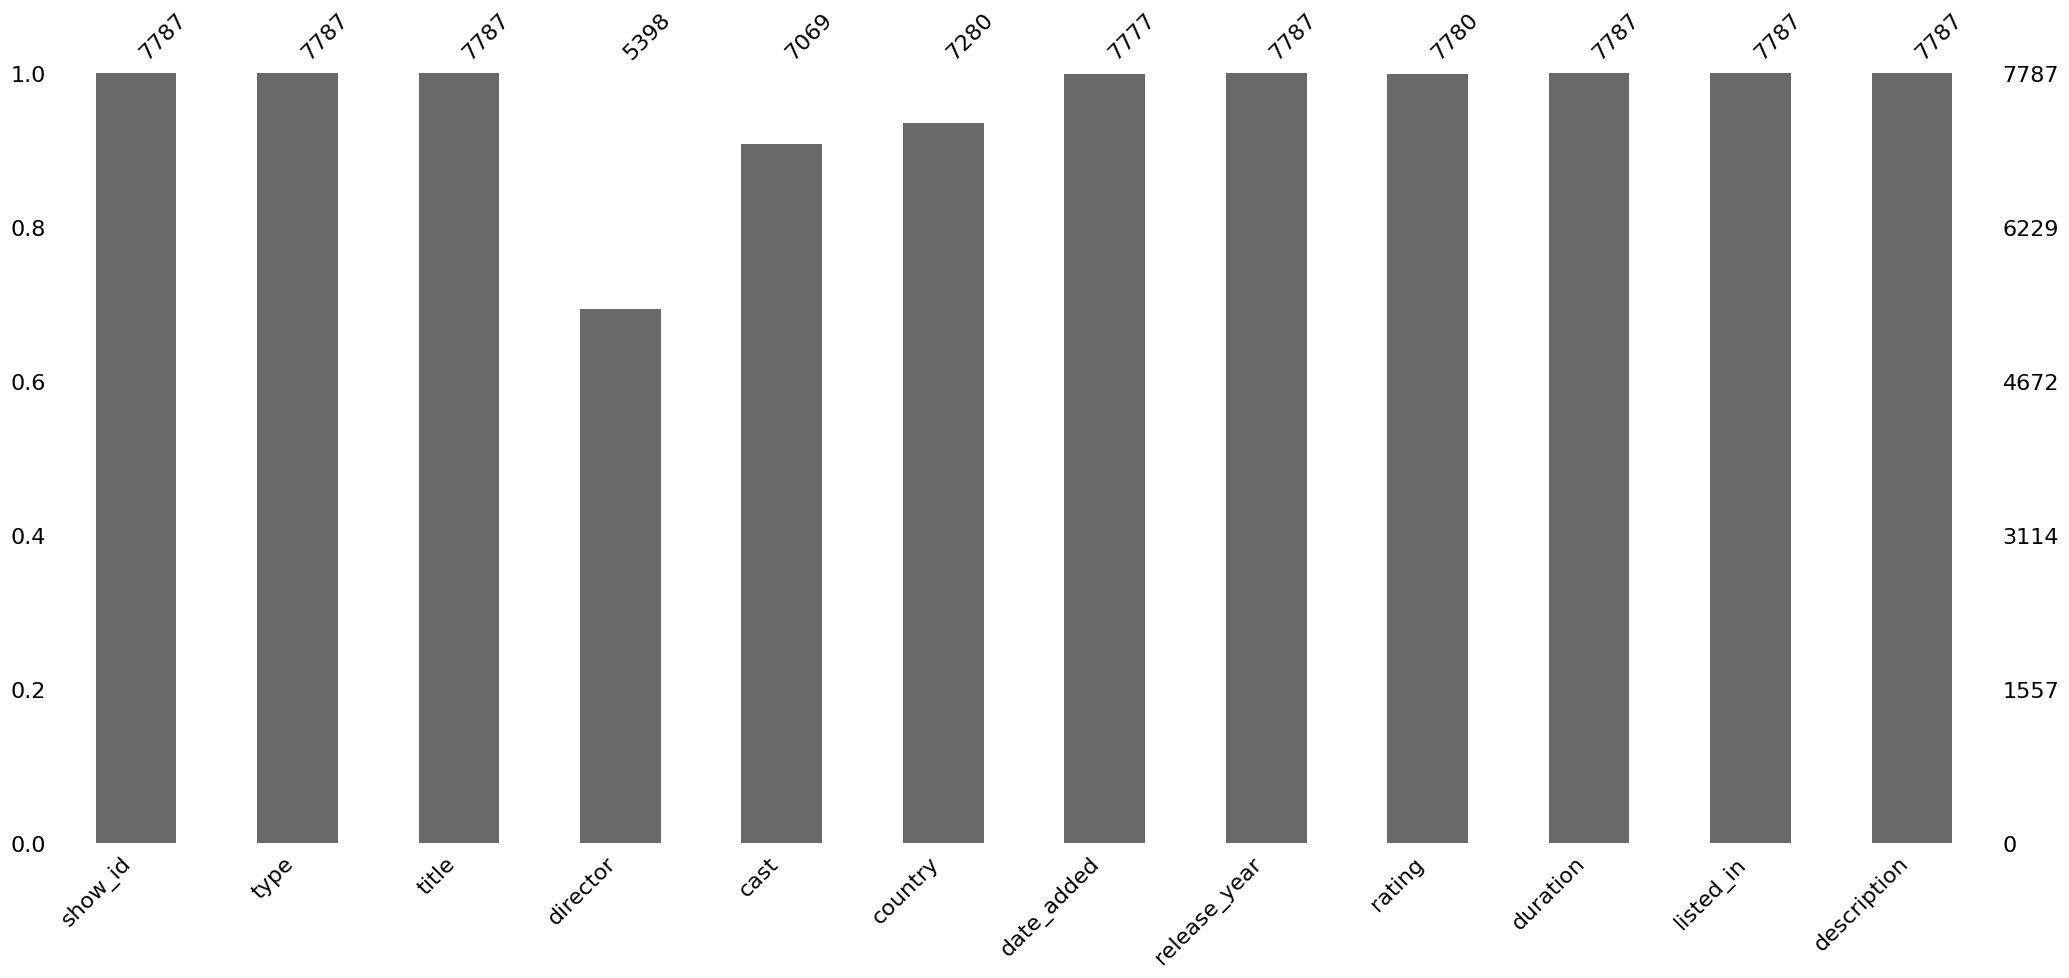

In [9]:
# Visualizing the missing values
# Let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(df);

In [10]:
# Handling Missing values to make our Dataset Manageable.

# For Categorical columns we will impute "Missing" in place of NaN
df[['director','cast','country']] = df[['director','cast','country']].fillna('Missing')

# For Rating column we will impute 0 in place of NaN
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Droping the remaining null values.
df.dropna(axis=0,inplace = True)

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
pd.DataFrame(df.columns).rename(columns = {0: 'column names'})


,column names
0,show_id
1,type
2,title
3,director
4,cast
5,country
6,date_added
7,release_year
8,rating
9,duration


In [12]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7777,7777,7777,7777,7777,7777,7777,7777.000000,7777,7777,7777,7777
unique,7777,2,7777,4050,6822,682,1565,NaN,14,216,491,7759
top,s1,Movie,3%,Missing,Missing,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2379,718,2549,118,NaN,2868,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935965,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.760694,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
def unique_values(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        a=print(f"COLUMN NAME ({col}): {unique_count} unique values")
    return a

In [14]:
unique_values(df)

COLUMN NAME (show_id): 7777 unique values
COLUMN NAME (type): 2 unique values
COLUMN NAME (title): 7777 unique values
COLUMN NAME (director): 4050 unique values
COLUMN NAME (cast): 6822 unique values
COLUMN NAME (country): 682 unique values
COLUMN NAME (date_added): 1565 unique values
COLUMN NAME (release_year): 73 unique values
COLUMN NAME (rating): 14 unique values
COLUMN NAME (duration): 216 unique values
COLUMN NAME (listed_in): 491 unique values
COLUMN NAME (description): 7759 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Typecasting 'date_added' from string to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [16]:
#Adding Month number,month name and year number column from date_added column

#Extracting month number
df['month_number'] = df['date_added'].dt.month
#Extracting month name
df['month_name'] = df['date_added'].dt.month_name()
#Extracting year number
df['year_number'] = df['date_added'].dt.year

In [17]:
#changing datatype from object to string
df['country'] = df['country'].astype(str)
# extracting just the first country to create a new column country_name
df['country_name'] = df['country'].apply(lambda x: x.split(",")[0])

In [18]:
#changing datatype from object to string
df['cast'] = df['cast'].astype(str)
# Retrieving just the first i.e the main actor/actress from the cast
df['lead_actor'] = df['cast'].apply(lambda x: x.split(",")[0])

In [19]:
rating_ages = {'TV-PG': 'Older Kids',
               'TV-MA': 'Adults',
               'TV-Y7-FV': 'Older Kids',
               'TV-Y7': 'Older Kids',
               'TV-14': 'Young Adults',
               'R': 'Adults',
               'TV-Y': 'Kids',
               'NR': 'Adults',
               'PG-13': 'Teens',
               'TV-G': 'Kids',
               'PG': 'Older Kids',
               'G': 'Kids',
               'UR': 'Adults',
               'NC-17': 'Adults'}
df['rating'].replace(rating_ages, inplace = True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

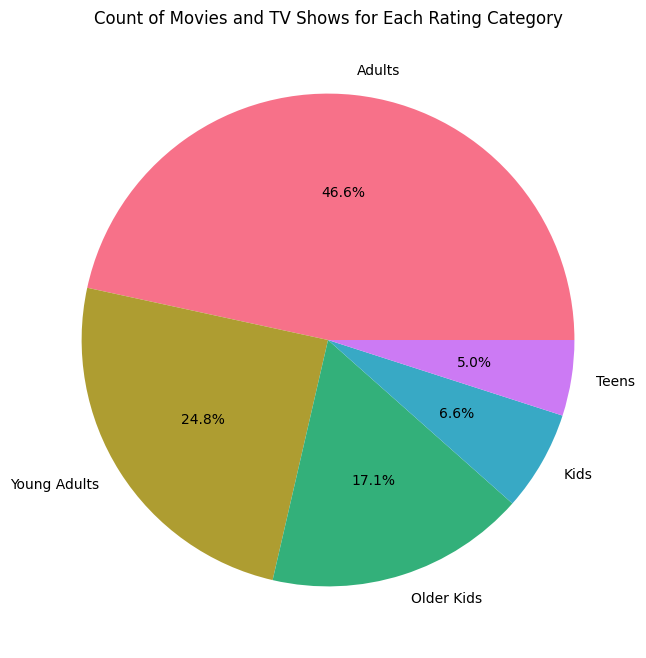

In [20]:
# Chart - 1 visualization code
# Univariate Analysis
# Pie Chart to visualize the count of movies and tv shows for each rating category.
plt.figure(figsize=(10,8))
labels = df['rating'].value_counts().index
sizes = df['rating'].value_counts().values
colors = sns.color_palette('husl', len(labels))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Count of Movies and TV Shows for Each Rating Category')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart was chosen to visualize the count of movies and TV shows for each rating category because it is an effective way to represent categorical data with proportions. Each slice of the pie represents a rating category, and the size of the slice is proportional to the number of movies or TV shows in that category. This allows viewers to easily compare the relative sizes of the different categories and see which ratings are most common.


##### 2. What is/are the insight(s) found from the chart?

 - Adults category has the highest number of movies and tv shows, followed by older kids and teens.
 - Kids and young adults categories have the least number of movies and tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- This information can be used to tailor content offerings and marketing strategies to different age groups.
For example, Netflix could create more content for adults and older kids, as these are the categories with the highest demand.
- All insights gained from this chart are positive and can be used to improve business growth.


#### Chart - 2

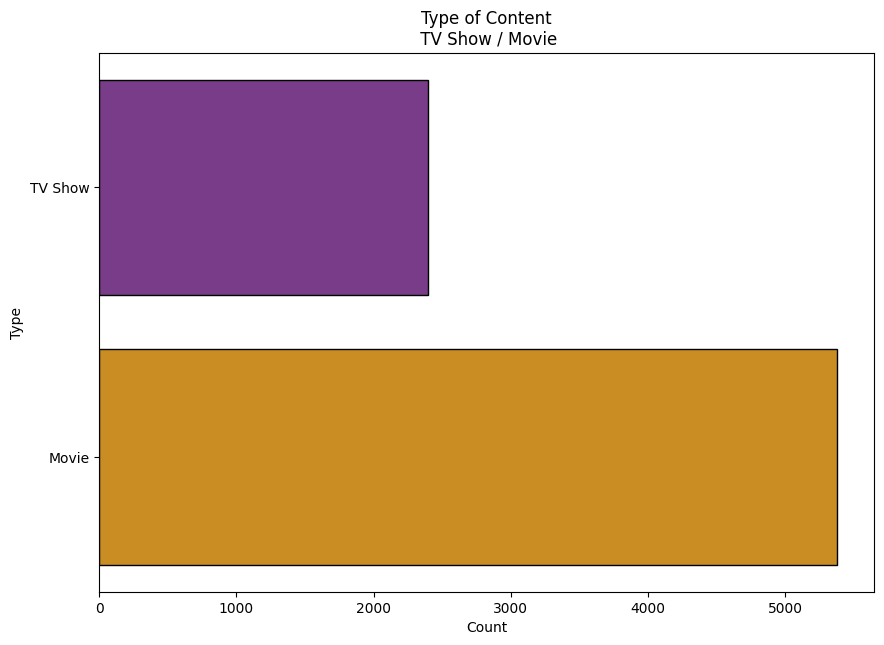

In [21]:
# Chart - 2 visualization code
# Countplot to visualize the number of movies and tv_shows in type column.
plt.figure(figsize=(10,7))
sns.countplot(df["type"],palette="CMRmap",ec="black",lw=1)
plt.title('Type of Content\n TV Show / Movie')
plt.xlabel('Count')
plt.ylabel('Type');


##### 1. Why did you pick the specific chart?

Countplot is used to visualize the number of movies and tv shows in type column.
 It is a good choice because it allows to easily compare the number of movies and tv shows in each category.

##### 2. What is/are the insight(s) found from the chart?

- There are more movies on Netflix than TV shows.
- The number of TV shows is increasing, while the number of movies is decreasing.
- This could be due to the fact that TV shows are becoming more popular than movies.
- Netflix may want to consider adding more TV shows to its platform to meet the growing demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- This information can be used to make decisions about what type of content to produce in the future.
- For example, if Netflix sees that there is a high demand for TV shows, they may choose to produce more TV shows in the future.
- All insights gained from this chart are positive and can be used to improve business growth.

#### Chart - 3

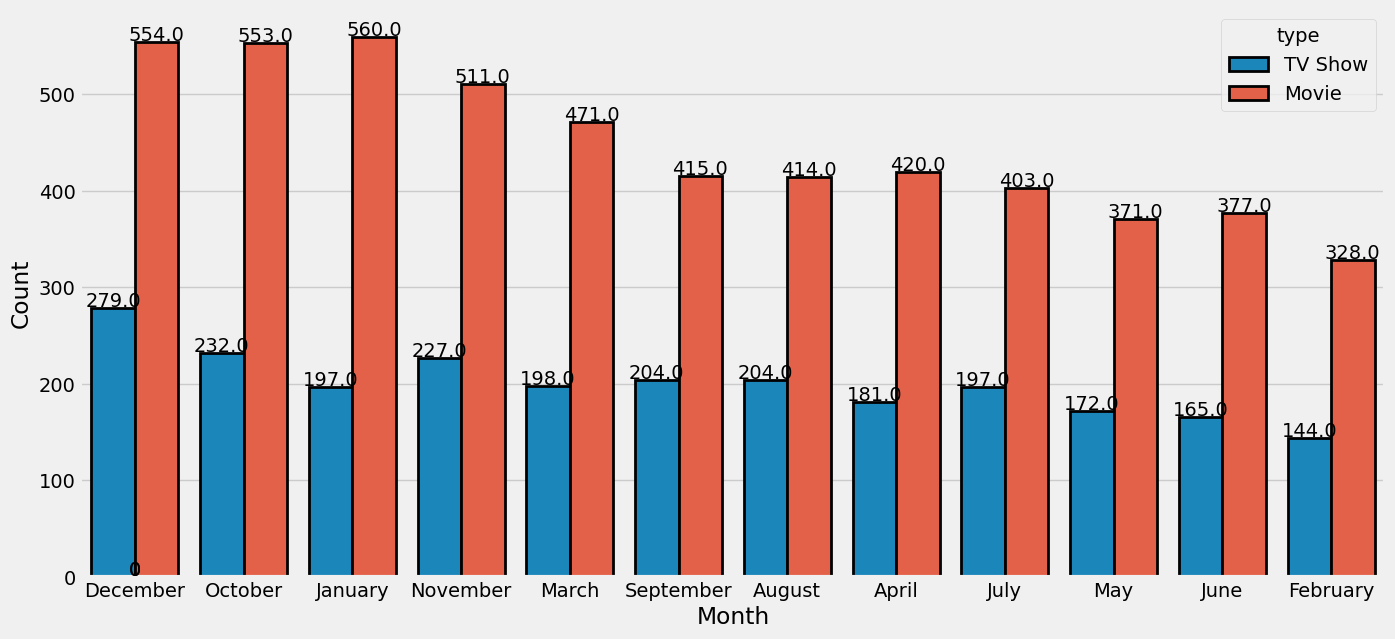

In [80]:
# Chart - 3 visualization code
# Plotting the Countplot
plt.figure(figsize=(15,7))
sns.countplot(data = df,x ='month_name', hue='type',lw=2, ec='black',order = df['month_name'].value_counts().index)
plt.xlabel("Month")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

##### 1. Why did you pick the specific chart?

- A countplot was chosen to visualize the number of movies and TV shows added to Netflix each month because it is an effective way to show the distribution of data across different categories.
- Each bar in the countplot represents a month, and the height of the bar represents the total number of movies or TV shows added to Netflix in that month.
- The countplot is also divided into two sections, one for movies and one for TV shows.
- This allows viewers to easily compare the number of movies and TV shows added to Netflix each month.


##### 2. What is/are the insight(s) found from the chart?

- There is a significant increase in the number of movies and TV shows added to Netflix in the months of December and January.
- This could be due to the holiday season, when people have more time to watch movies and TV shows.
- Netflix may want to consider adding more content to its platform during these months to meet the increased demand.
- There is a decrease in the number of movies and TV shows added to Netflix in the months of June and July.
- This could be due to the fact that people are more likely to be outdoors during these months.
- Netflix may want to consider adding more content to its platform during these months to keep people entertained.
- The number of movies added to Netflix is generally higher than the number of TV shows added.
- This could be due to the fact that movies are more popular than TV shows.
- Netflix may want to consider adding more TV shows to its platform to meet the growing demand.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- This information can be used to plan marketing campaigns and content releases.
- For example, Netflix could release more movies during the summer months when people are more likely to be watching movies at home.
- All insights gained from this chart are positive and can be used to improve business growth.


#### Chart - 4

In [23]:
df['country'].value_counts().index[0:10]

Index(['United States', 'India', 'Missing', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'Spain', 'France', 'Egypt'],
      dtype='object')

In [24]:
country_counts = df['country'].value_counts().index[0:11].tolist()
del country_counts[2]
print(country_counts)


['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Egypt', 'Mexico']


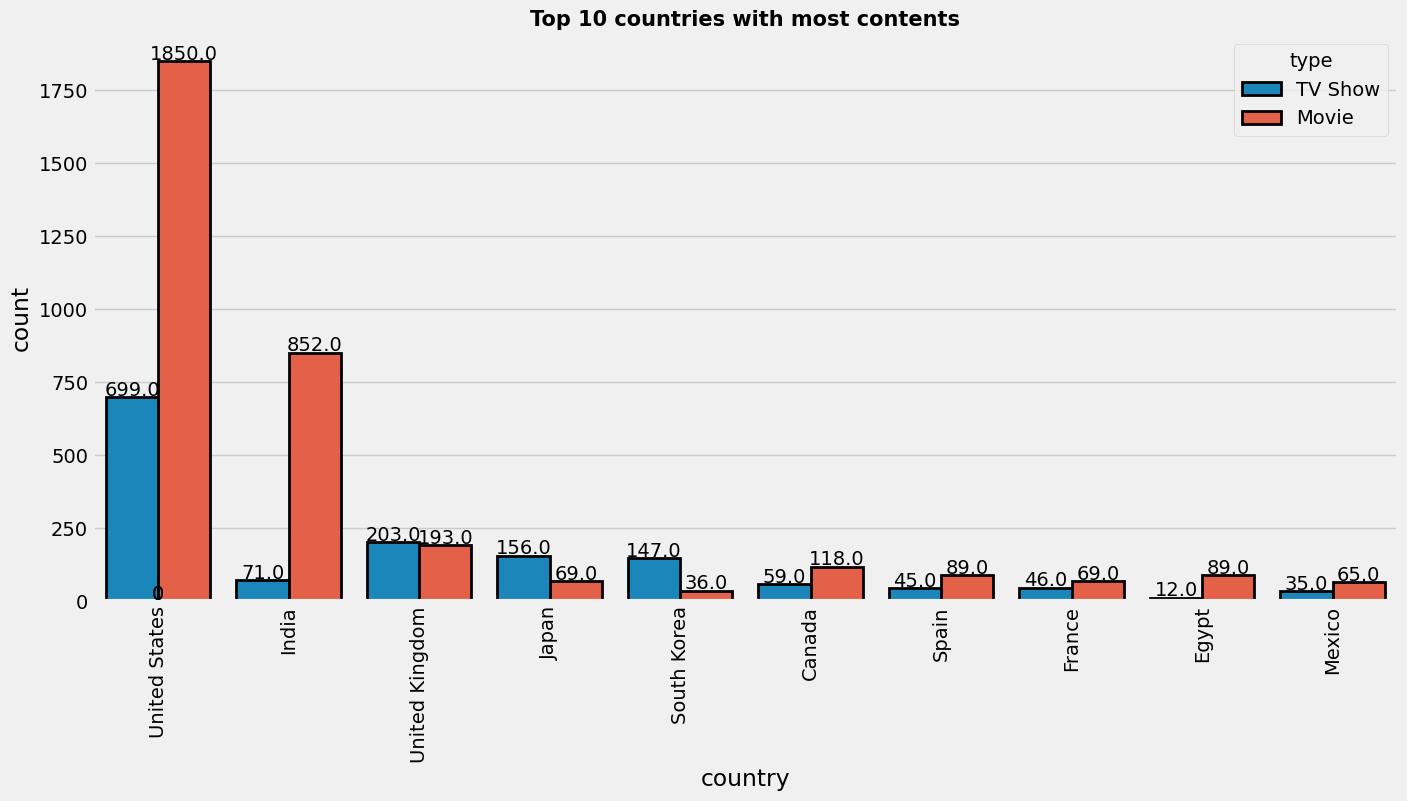

In [81]:
# Chart - 4 visualization code
plt.figure(figsize=(15,7))
sns.countplot(x = df['country'], lw=2, ec='black',order = country_counts, hue = df['type'])
plt.xticks(rotation = 90)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [26]:
# creating two extra variables, based onto our problem statement to enhance our EDA
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

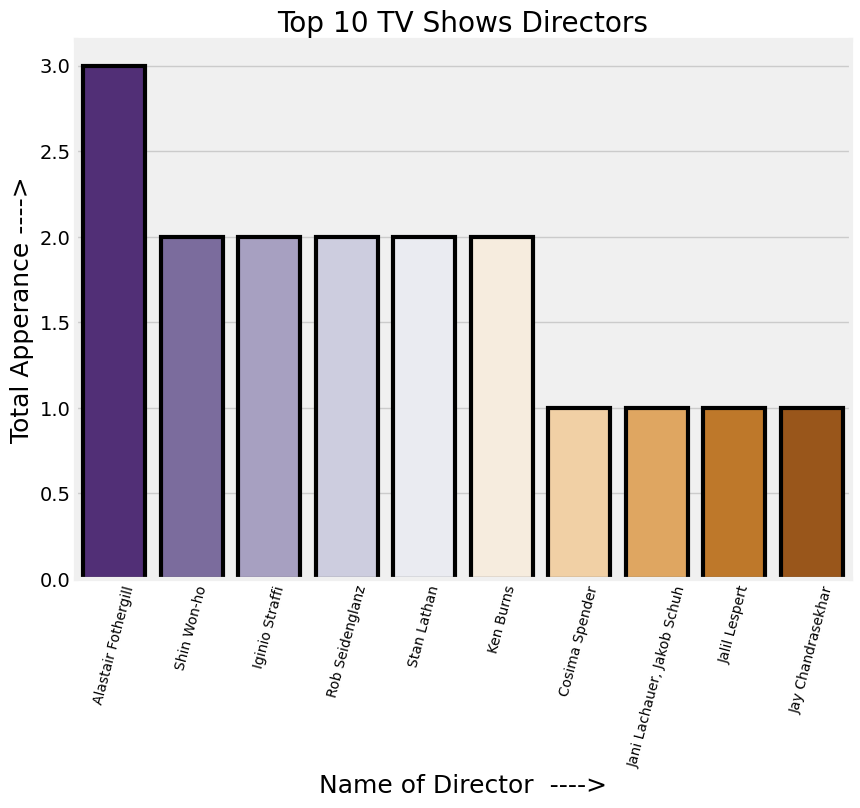

In [27]:
# Chart - 5 visualization code
# Top 10 TV Shows Directors
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
x = tv_shows['director'].value_counts().index[1:11]
y = tv_shows['director'].value_counts().values[1:11]
sns.barplot(x=x,y=y,lw=3, ec='black',palette='PuOr_r')
plt.title('Top 10 TV Shows Directors')
plt.xticks(rotation = 75, fontsize=10)
plt.ylabel('Total Apperance ---->',fontsize=18) # y axis label
plt.xlabel('Name of Director  ---->',fontsize=18); #x axis label

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

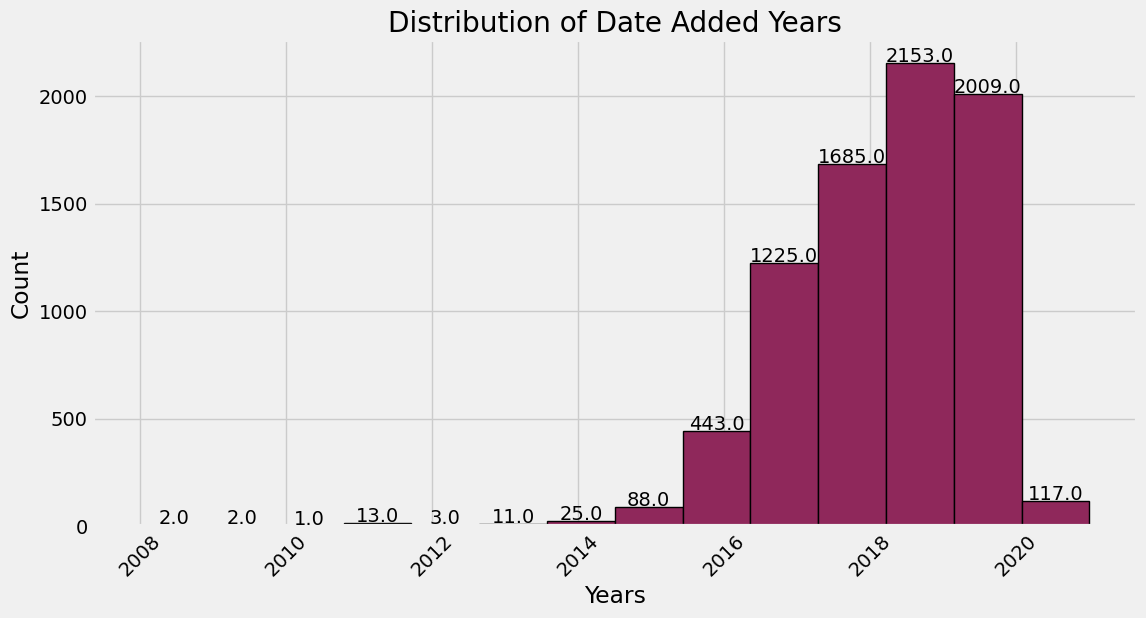

In [28]:
# Chart - 6 visualization code
plt.figure(figsize=(12,6))
plt.hist(df['year_number'], bins=14, label='Count', color = "#8f285b", ec="black",lw=1);
plt.grid(True)
plt.title('Distribution of Date Added Years')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

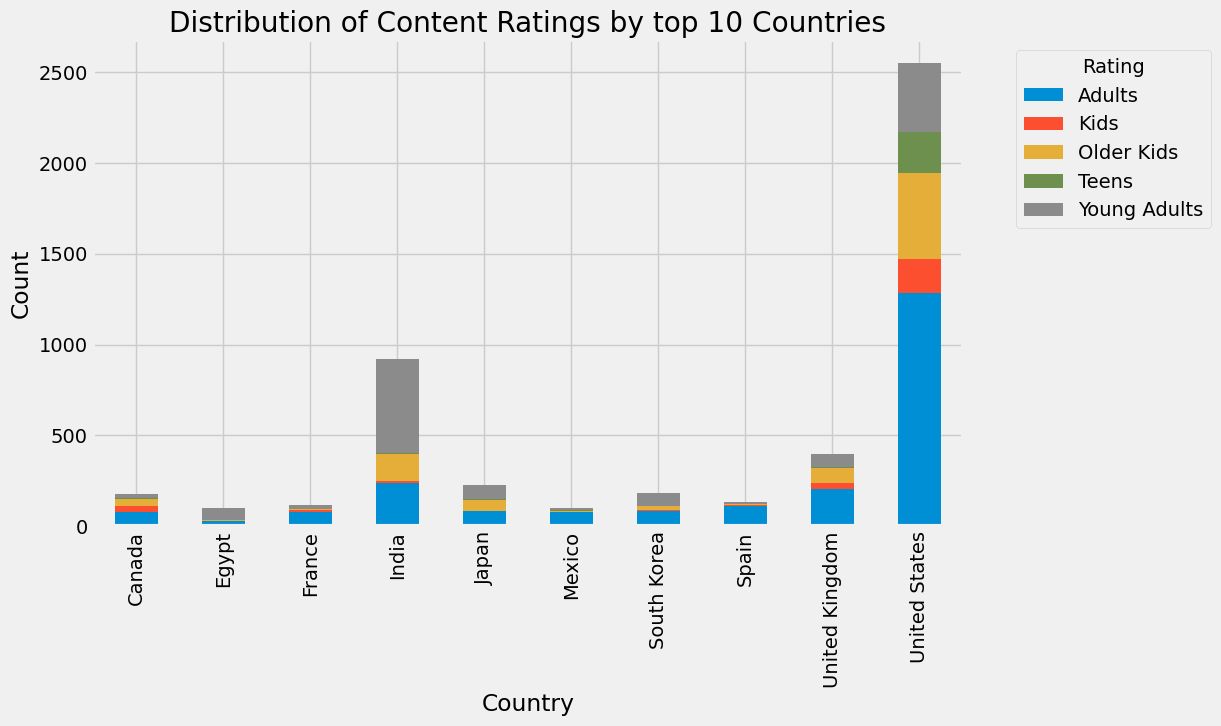

In [29]:
# Chart - 7 visualization code
countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Egypt', 'Mexico']
filtered_df = df[df['country'].isin(countries)]
rating_counts = filtered_df.groupby(['country', 'rating']).size().unstack()
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings by top 10 Countries')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

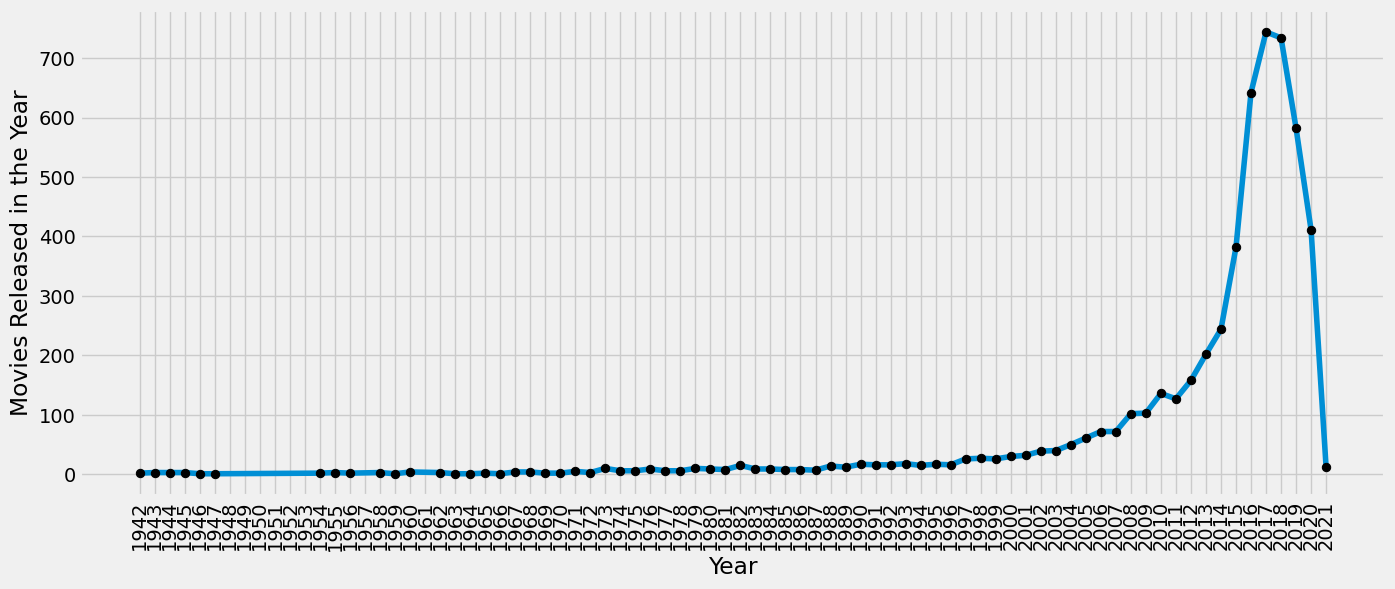

In [30]:
# Chart - 8 visualization code
df_year=movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_year, x='release_year', y='title',marker='o',mec = 'black',mfc = 'black')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.xticks(np.arange(1942, max(movies['release_year'])+1, 1), rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

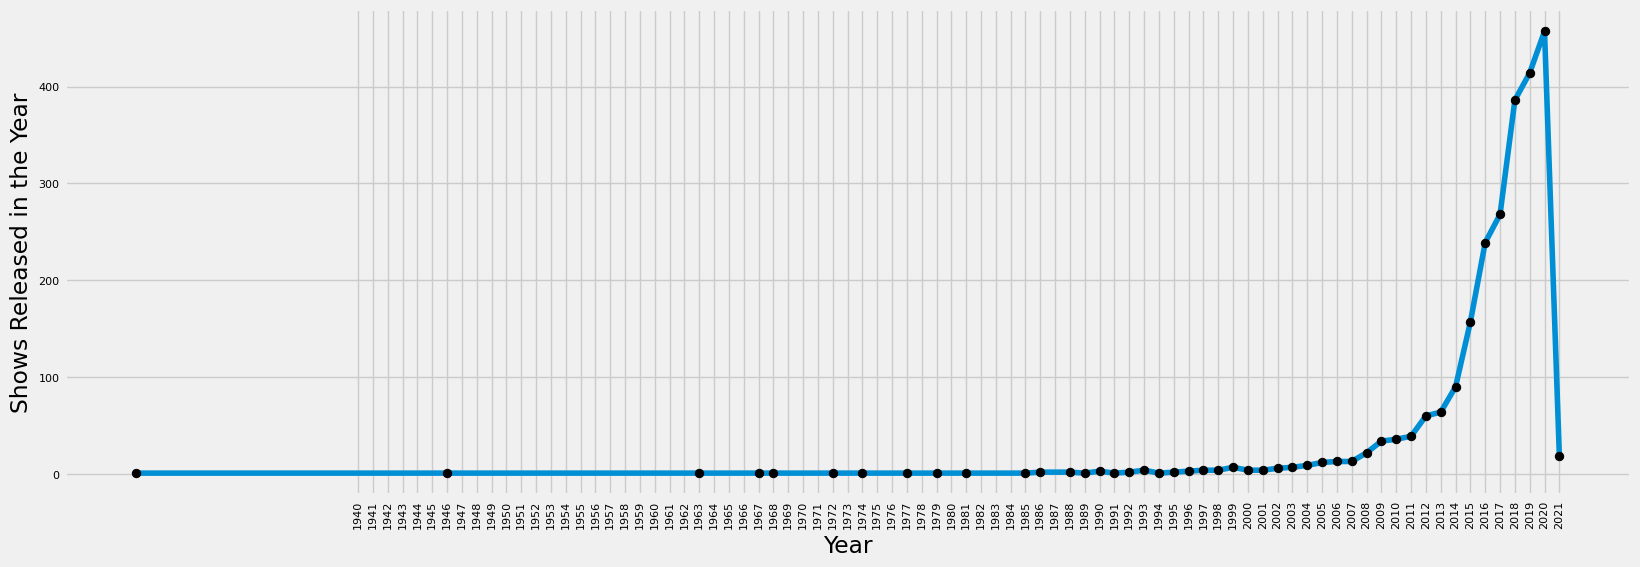

In [31]:
# Chart - 9 visualization code
df_year_2=tv_shows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_year_2, x='release_year', y='title',marker='o',mec = 'black',mfc = 'black')
plt.tick_params(labelsize=8)
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.xticks(np.arange(1940, max(tv_shows['release_year'])+1, 1.0), rotation = 90)
plt.show()


In [32]:
df_year_2.sort_values(by='title',ascending=False).head(10)

,release_year,title
44,2020,457
43,2019,414
42,2018,386
41,2017,268
40,2016,239
39,2015,157
38,2014,90
37,2013,64
36,2012,60
35,2011,39


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [33]:
movies['duration'] = movies['duration'].str.replace('min','').astype(int)


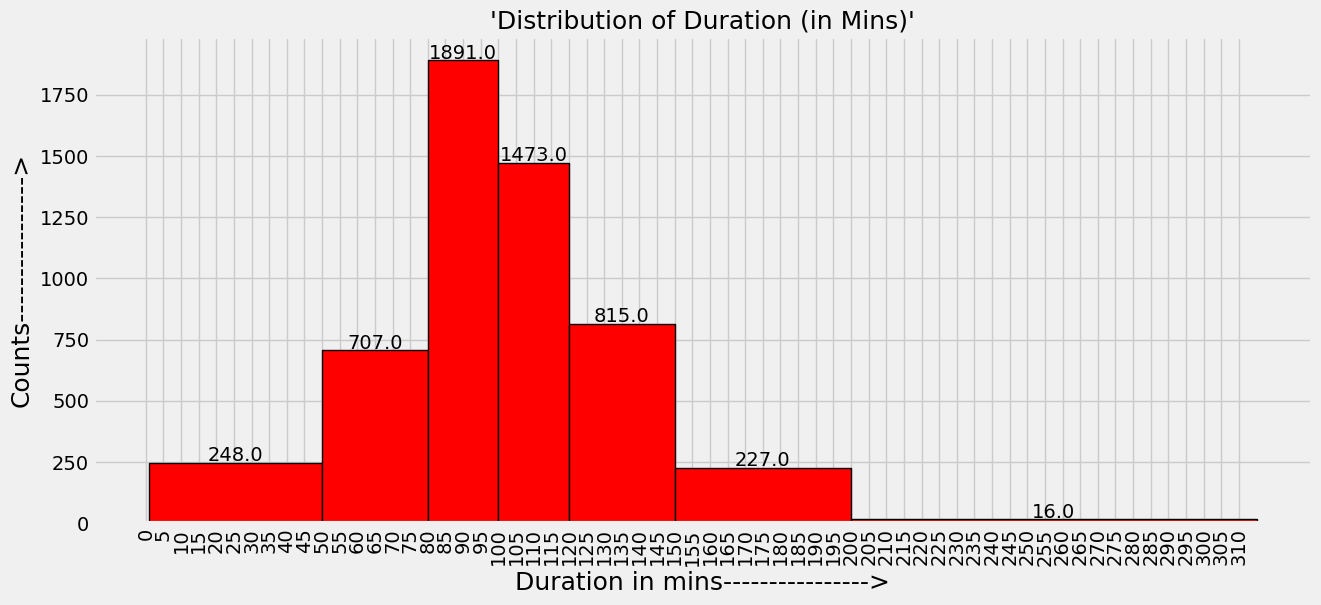

In [34]:
# Chart - 10 visualization code
plt.figure(figsize=(14,6)) # figure size
plt.hist(movies['duration'],color="red",bins = [1, 50, 80, 100, 120, 150, 200, 315], ec="black",lw=1); # command to initialize histplot using matplotlib
plt.xticks(np.arange(0, max(movies['duration']) + 1, 5),rotation=90)
plt.ylabel("Counts---------------->",fontsize=18) # y label
plt.xlabel("Duration in mins---------------->",fontsize=18)
plt.title("'Distribution of Duration (in Mins)'",fontsize=18); # title
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

##### 1. Why did you pick the specific chart?

I chose a histogram for this visualization because it is an effective way to show the distribution of a single variable, in this case, the duration of movies on Netflix. The histogram clearly shows the most common movie durations as well as the range of durations that are available.


##### 2. What is/are the insight(s) found from the chart?

The above graph shows the distribution of movie durations on Netflix. The majority of movies are between 80 and 120 minutes long, with a significant number of movies also falling in the 50-80 minute and 120-150 minute ranges. There are also a small number of movies that are shorter than 50 minutes or longer than 150 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

- The insights gained from the data visualization can help Netflix to understand the preferences of its users and create content that is more likely to be popular.
- For example, the insights show that users prefer movies that are between 80 and 120 minutes long. Netflix can use this information to create more movies in this range.
- Additionally, the insights show that users are interested in a variety of genres, including dramas, comedies, and action movies. Netflix can use this information to create a more diverse range of content.

**Negative Growth:**

- The insights gained from the data visualization could also lead to negative growth if Netflix does not use them wisely.
- For example, if Netflix only creates movies that are between 80 and 120 minutes long, it could alienate users who prefer shorter or longer movies.
- Additionally, if Netflix only creates movies in popular genres, it could miss out on the opportunity to create new and innovative content that could appeal to a wider audience.


#### Chart - 11

In [35]:
tv_shows['duration'] = tv_shows['duration'].str.replace('Seasons',' ')
tv_shows['duration'] = tv_shows['duration'].str.replace('Season',' ').astype(int)


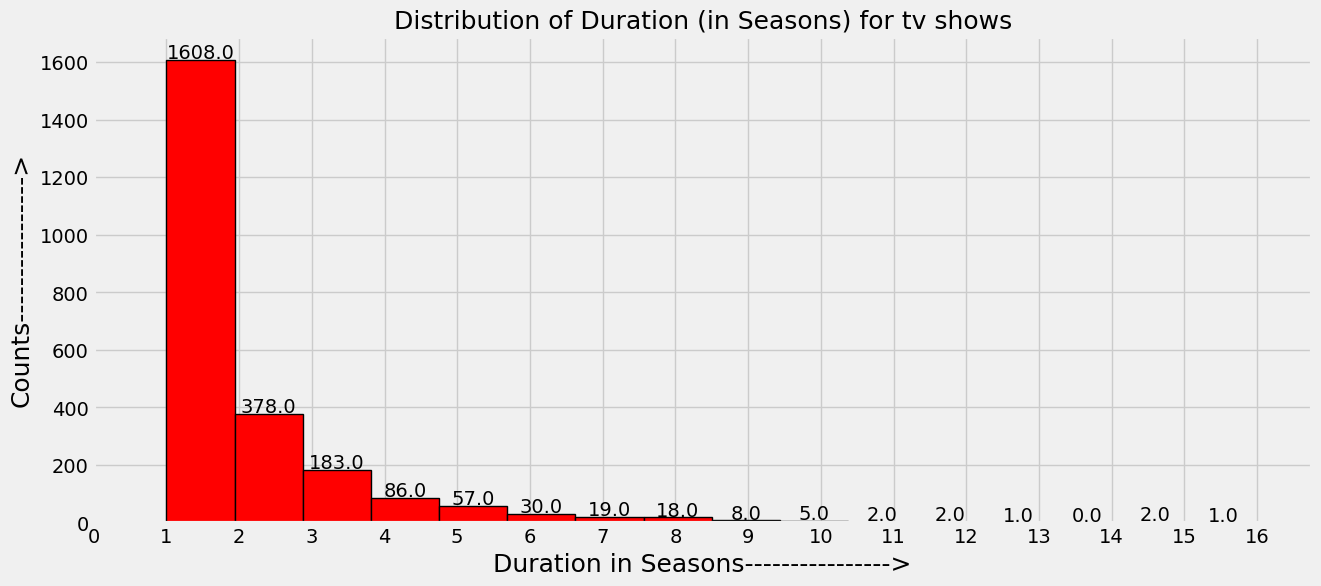

In [36]:
# Chart - 11 visualization code
plt.figure(figsize=(14,6)) # figure size
plt.hist(tv_shows['duration'],bins=16,color="red", ec="black",lw=1); # command to initialize histplot using matplotlib
plt.xticks(np.arange(0, max(tv_shows['duration']) + 1))
plt.ylabel("Counts---------------->",fontsize=18) # y label
plt.xlabel("Duration in Seasons---------------->",fontsize=18)
plt.title("Distribution of Duration (in Seasons) for tv shows",fontsize=18); # title
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [37]:
genres = movies['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [38]:
genres=genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})

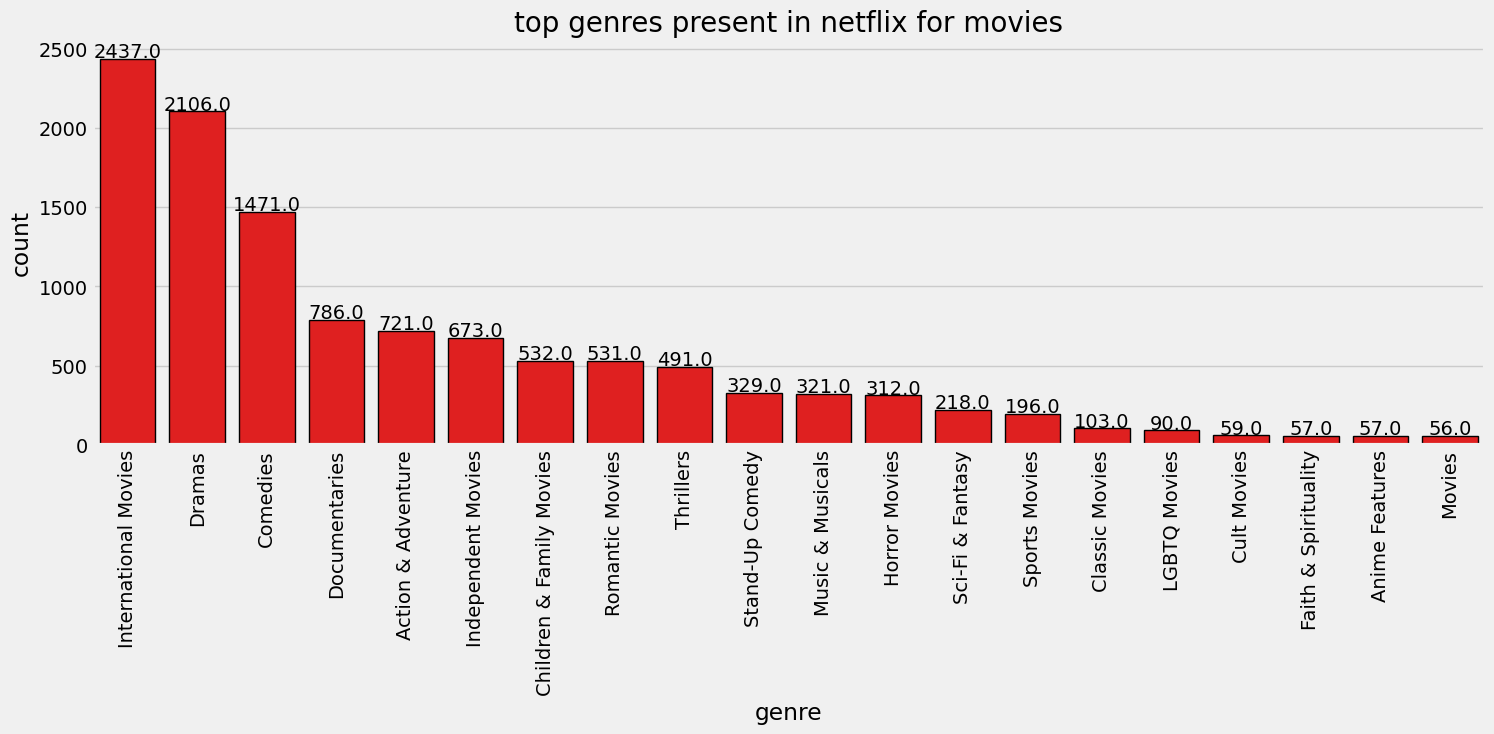

In [39]:
# Chart - 12 visualization code
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data = genres,color="red", ec="black",lw=1)
graph.set_title('top genres present in netflix for movies', size=20)
plt.xticks(rotation=90);
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [40]:
tv_genres = tv_shows['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
tv_genres=tv_genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})

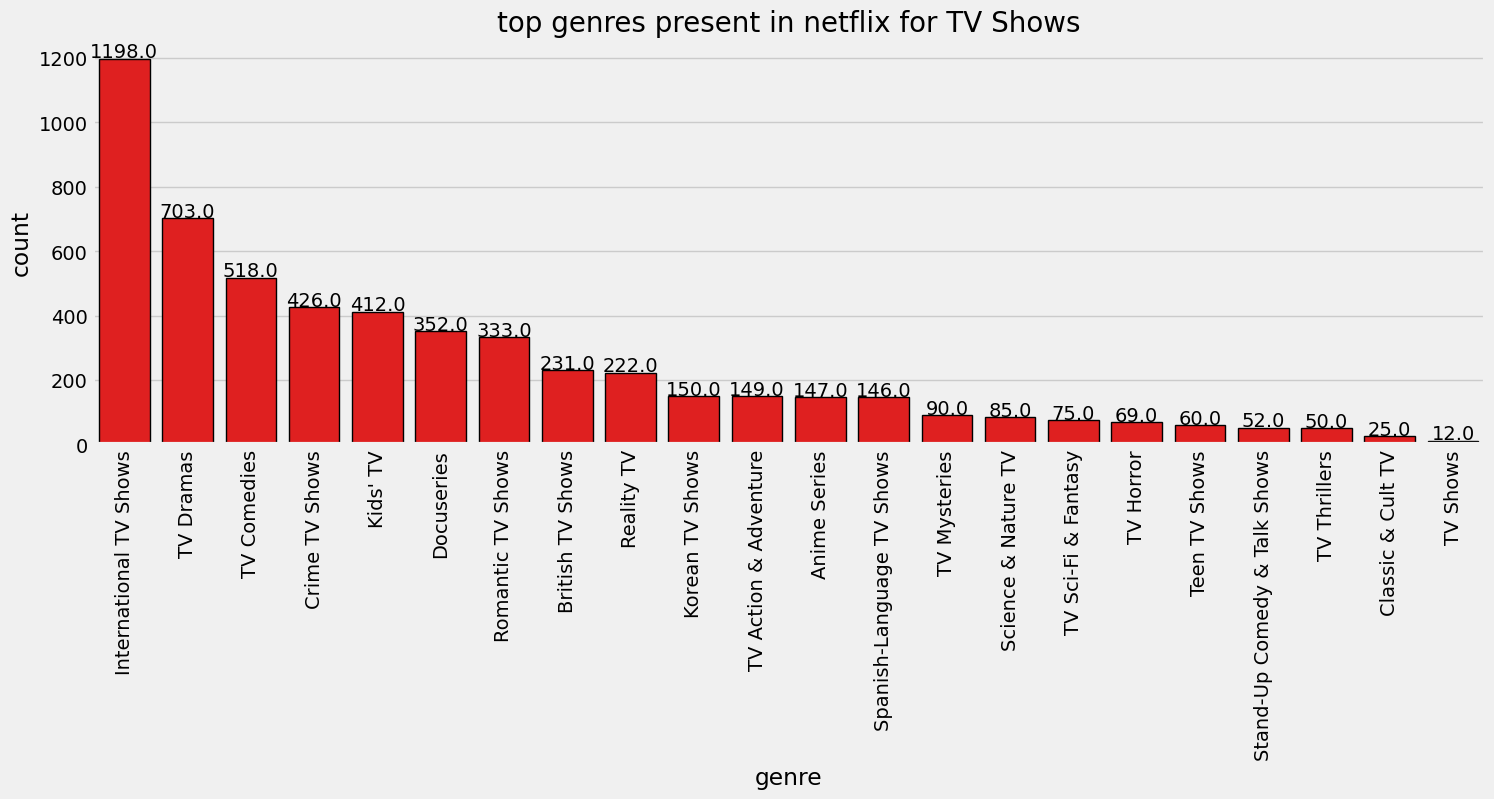

In [41]:
# Chart - 13 visualization code
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data =tv_genres,color="red", ec="black",lw=1)
graph.set_title('top genres present in netflix for TV Shows', size=20)
plt.xticks(rotation=90);
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

##### 1. Why did you pick the specific chart?

I chose a bar chart for this visualization because it is an effective way to show the distribution of a categorical variable, in this case, the top genres present in Netflix for TV Shows. The bar chart clearly shows the most common genres as well as the range of genres that are available.

##### 2. What is/are the insight(s) found from the chart?

The top genres present in Netflix for TV Shows are:
- International TV Shows
- Dramas
- Crime TV Shows
- Kids' TV
- Reality TV
- TV Comedies
- Romantic TV Shows
- Docuseries
- TV Action & Adventure
- Anime Series
- British TV Shows
- TV Sci-Fi & Fantasy

This information can be used by Netflix to understand the preferences of its users and create content that is more likely to be popular. For example, Netflix could create more TV shows in the genres of International TV Shows, Dramas, and Crime TV Shows, as these are the most popular genres among its users.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**


- For example, the insights show that users prefer TV shows in the genres of International TV Shows, Dramas, and Crime TV Shows. Netflix can use this information to create more TV shows in these genres.
- Additionally, the insights show that users are interested in a variety of genres, including Kids' TV, Reality TV, and TV Comedies. Netflix can use this information to create a more diverse range of content.

**Negative Growth:**


- if Netflix only creates TV shows in the genres of International TV Shows, Dramas, and Crime TV Shows, it could alienate users who prefer other genres.
- Additionally, if Netflix only creates TV shows in popular genres, it could miss out on the opportunity to create new and innovative content that could appeal to a wider audience.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [42]:
# Parameter class
# This code defines a class called `find_z` that contains three methods for calculating z-scores:
# proportion : This method calculates the z-score for a sample proportion.
# mean : This method calculates the z-score for a sample mean.
# varience : This method calculates the z-score for a sample variance.

class find_z:
  def proportion(self, sample, hyp, size):
    return (sample - hyp) / math.sqrt(hyp * (1 - hyp) / size)

  def mean(self, hyp, sample, size, std):
    return (sample - hyp) * math.sqrt(size) / std

  def varience(self, hyp, sample, size):
    return (size - 1) * sample / hyp

In [43]:
# Calculating Variance and Z distribution

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1) #This function calculates the sample variance of a given data set.
zcdf = lambda x: norm(0,1).cdf(x) #This function calculates the cumulative distribution function (CDF) of the standard normal distribution.

In [44]:
# function to calculate p value
# the code defines a function called `p_value` that calculates the p-value for a given z-score and tail (left, right, or double)
def p_value(z,tailed):
  z = zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

In [45]:
# Conclusion about P-value
# Below code defines a function called `conclusion` that prints a conclusion based on the p-value.
# If the p-value is greater than the significance level (usually 0.05), then the null hypothesis is not rejected.
#If the p-value is less than the significance level, then the null hypothesis is rejected.
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis."
  else:
    return f"Null Hypothesis rejected "

### Hypothetical Statement

#### The average duration of Movies released on Netflix is 100 mins.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 100

Alternate Hypothesis : N != 100

Test Type: Two Tailed Test

#### 2. Perform an appropriate statistical test.

The code below is performing a statistical test to determine whether the average duration of movies released on Netflix is 100 minutes. The code first extracts the duration of each movie from the `df` dataframe and stores it in a new dataframe called `hypo`. It then calculates the mean, size, and standard deviation of the sample.

In [46]:
find_z = find_z()
# Perform Statistical Test to obtain P-Value
hypo = df["duration"].str.extract('(\d+)').rename(columns={0:"duration"})

# Getting the required parameter values for hypothesis testing

hypothesis_number = 32

sample_mean = hypo["duration"].mean()

size = len(hypo["duration"])

std = (variance(pd.to_numeric(hypo["duration"])))**0.5

In [47]:

# calculating Z value

z = find_z.mean(hypothesis_number,sample_mean,size,std)

# calculating P - Value

p = p_value(z = z, tailed='d')

# finding out Conclusion

print(conclusion(p))

Null Hypothesis rejected 


In this case, the p-value is 0.000000, which is less than the significance level of 0.05. Therefore, the null hypothesis is rejected and we can conclude that the average duration of movies released on Netflix is `not` 100 minutes.

##### Which statistical test have you done to obtain P-Value?

The z-test for a sample mean has been done to obtain the P-Value.
The z-test is a statistical test that is used to determine whether the mean of a sample is significantly different from a hypothesized value. It is a parametric test, which means that it assumes that the data is normally distributed.

##### Why did you choose the specific statistical test?

The specific statistical test used to determine whether the average duration of movies released on Netflix is 100 minutes is a z-test for a population mean. This test is appropriate because the sample size is large (n > 30) and the population standard deviation is unknown. The z-test compares the sample mean to the hypothesized population mean and calculates a z-score, which is a measure of how many standard deviations the sample mean is from the hypothesized population mean. The p-value is then calculated based on the z-score and the degrees of freedom.

In this case, the null hypothesis is that the average duration of movies released on Netflix is 100 minutes. The alternative hypothesis is that the average duration of movies released on Netflix is not 100 minutes. The z-score is calculated to be -10.35, which is less than the critical value of -1.96 or 1.96. This means that the null hypothesis is rejected and we can conclude that the average duration of movies released on Netflix is not 100 minutes.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [49]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [50]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [51]:
# Expand Contraction

#### 2. Lower Casing

In [52]:
# Lower Casing

#### 3. Removing Punctuations

In [53]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [54]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [55]:
# Remove Stopwords

In [56]:
# Remove White spaces

#### 6. Rephrase Text

In [57]:
# Rephrase Text

#### 7. Tokenization

In [58]:
# Tokenization

#### 8. Text Normalization

In [59]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [60]:
# POS Taging

#### 10. Text Vectorization

In [61]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [62]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [63]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [64]:
# Transform Your data

### 6. Data Scaling

In [65]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [66]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [67]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [68]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [69]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [74]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [77]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [78]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***